In [2]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics as st
from keras_radam import RAdam
from scipy import stats
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import regularizers
from keras.optimizers import Adam
from sklearn.metrics import classification_report

# Import custom functions
from preprocessing import *
from evaluation import *

In [108]:
#import sys
#!{sys.executable} -m pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-py3-none-any.whl size=14783 sha256=78890608ba8191861807a78d632cc4aabf742f22ae64c9ff8177bfb14c2be37a
  Stored in directory: /Users/shilpakancharla/Library/Caches/pip/wheels/f6/bd/d1/879e5d35e5707575e1de97e0b45d46a3a878a7269217f27526
Successfully built keras-rectified-adam


# Preprocessing

In [106]:
# List of training X_files
X_files = ['TrainingData/subject_001_02__x.csv', 'TrainingData/subject_001_03__x.csv', 
           'TrainingData/subject_001_04__x.csv', 'TrainingData/subject_001_05__x.csv', 
           'TrainingData/subject_001_06__x.csv', 'TrainingData/subject_001_07__x.csv', 
           'TrainingData/subject_002_01__x.csv', 'TrainingData/subject_002_03__x.csv', 
           'TrainingData/subject_002_04__x.csv', 'TrainingData/subject_002_05__x.csv', 
           'TrainingData/subject_003_01__x.csv', 'TrainingData/subject_005_02__x.csv',
           'TrainingData/subject_005_03__x.csv', 'TrainingData/subject_006_01__x.csv', 
           'TrainingData/subject_006_03__x.csv', 'TrainingData/subject_007_01__x.csv', 
           'TrainingData/subject_007_02__x.csv', 'TrainingData/subject_007_03__x.csv',
           'TrainingData/subject_001_01__x.csv', 'TrainingData/subject_003_02__x.csv', 
           'TrainingData/subject_003_03__x.csv', 'TrainingData/subject_005_01__x.csv',
           'TrainingData/subject_004_01__x.csv', 'TrainingData/subject_004_02__x.csv',
           'TrainingData/subject_008_01__x.csv', 'TrainingData/subject_007_04__x.csv',
           'TrainingData/subject_002_02__x.csv', 'TrainingData/subject_006_02__x.csv',
           'TrainingData/subject_001_08__x.csv']

# List of training X_t_files
X_t_files = ['TrainingData/subject_001_02__x_time.csv', 'TrainingData/subject_001_03__x_time.csv', 
             'TrainingData/subject_001_04__x_time.csv', 'TrainingData/subject_001_05__x_time.csv', 
             'TrainingData/subject_001_06__x_time.csv', 'TrainingData/subject_001_07__x_time.csv', 
             'TrainingData/subject_002_01__x_time.csv', 'TrainingData/subject_002_03__x_time.csv', 
             'TrainingData/subject_002_04__x_time.csv', 'TrainingData/subject_002_05__x_time.csv', 
             'TrainingData/subject_003_01__x_time.csv', 'TrainingData/subject_005_02__x_time.csv', 
             'TrainingData/subject_005_03__x_time.csv', 'TrainingData/subject_006_01__x_time.csv',  
             'TrainingData/subject_006_03__x_time.csv', 'TrainingData/subject_007_01__x_time.csv', 
             'TrainingData/subject_007_02__x_time.csv', 'TrainingData/subject_007_03__x_time.csv',
             'TrainingData/subject_001_01__x_time.csv', 'TrainingData/subject_005_01__x_time.csv',
             'TrainingData/subject_003_02__x_time.csv', 'TrainingData/subject_003_03__x_time.csv',
             'TrainingData/subject_004_01__x_time.csv', 'TrainingData/subject_004_02__x_time.csv',
             'TrainingData/subject_008_01__x_time.csv', 'TrainingData/subject_007_04__x_time.csv',
             'TrainingData/subject_002_02__x_time.csv', 'TrainingData/subject_006_02__x_time.csv',
             'TrainingData/subject_001_08__x_time.csv']

# List of training y_files
y_files = ['TrainingData/subject_001_02__y.csv', 'TrainingData/subject_001_03__y.csv',
           'TrainingData/subject_001_04__y.csv', 'TrainingData/subject_001_05__y.csv',
           'TrainingData/subject_001_06__y.csv', 'TrainingData/subject_001_07__y.csv', 
           'TrainingData/subject_002_01__y.csv', 'TrainingData/subject_002_03__y.csv', 
           'TrainingData/subject_002_04__y.csv', 'TrainingData/subject_002_05__y.csv', 
           'TrainingData/subject_003_01__y.csv', 'TrainingData/subject_005_02__y.csv', 
           'TrainingData/subject_005_03__y.csv', 'TrainingData/subject_006_01__y.csv',  
           'TrainingData/subject_006_03__y.csv', 'TrainingData/subject_007_01__y.csv', 
           'TrainingData/subject_007_02__y.csv', 'TrainingData/subject_007_03__y.csv',
           'TrainingData/subject_001_01__y.csv', 'TrainingData/subject_005_01__y.csv',
           'TrainingData/subject_003_02__y.csv', 'TrainingData/subject_003_03__y.csv',
           'TrainingData/subject_004_01__y.csv', 'TrainingData/subject_004_02__y.csv',
           'TrainingData/subject_008_01__y.csv', 'TrainingData/subject_007_04__y.csv',
           'TrainingData/subject_002_02__y.csv', 'TrainingData/subject_006_02__y.csv',
           'TrainingData/subject_001_08__y.csv']

y_t_files = ['TrainingData/subject_001_02__y_time.csv', 'TrainingData/subject_001_03__y_time.csv', 
             'TrainingData/subject_001_04__y_time.csv', 'TrainingData/subject_001_05__y_time.csv', 
             'TrainingData/subject_001_06__y_time.csv', 'TrainingData/subject_001_07__y_time.csv', 
             'TrainingData/subject_002_01__y_time.csv', 'TrainingData/subject_002_03__y_time.csv', 
             'TrainingData/subject_002_04__y_time.csv', 'TrainingData/subject_002_05__y_time.csv', 
             'TrainingData/subject_003_01__y_time.csv', 'TrainingData/subject_005_02__y_time.csv', 
             'TrainingData/subject_005_03__y_time.csv', 'TrainingData/subject_006_01__y_time.csv',  
             'TrainingData/subject_006_03__y_time.csv', 'TrainingData/subject_007_01__y_time.csv', 
             'TrainingData/subject_007_02__y_time.csv', 'TrainingData/subject_007_03__y_time.csv',
             'TrainingData/subject_001_01__y_time.csv', 'TrainingData/subject_005_01__y_time.csv',
             'TrainingData/subject_003_02__y_time.csv', 'TrainingData/subject_003_03__y_time.csv',
             'TrainingData/subject_004_01__y_time.csv', 'TrainingData/subject_004_02__y_time.csv',
             'TrainingData/subject_008_01__y_time.csv', 'TrainingData/subject_007_04__y_time.csv',
             'TrainingData/subject_002_02__y_time.csv', 'TrainingData/subject_006_02__y_time.csv',
             'TrainingData/subject_001_08__y_time.csv']

training_X, training_y = generate_data(X_files, X_t_files, y_files, y_t_files)
print(training_X.shape, training_y.shape)

(210171, 30, 6) (210171, 1)
(124372, 30, 6) (124372, 1)


In [112]:
n_timesteps, n_features, n_outputs = training_X.shape[1], training_X.shape[2], training_y_encoded.shape[1]
initializer = tf.keras.initializers.Orthogonal()

def define_LSTM_model(dropout_rate):
    model = Sequential()
    model.add(LSTM(units = 125, kernel_initializer = initializer,
                   #kernel_regularizer = regularizers.l1_l2(l1 = l1_value, l2 = l2_value),
                   input_shape = (n_timesteps, n_features)))
    model.add(Dropout(rate = dropout_rate))
    model.add(Dense(units = 125, activation = 'tanh'))
    model.add(Dense(units = n_outputs, activation = 'softmax'))
    model.compile(RAdam(), loss = 'categorical_crossentropy', 
                  metrics = ['accuracy', f1, precision_measure, recall_measure])
    return model
    
def evaluate_model(training_X, training_y_encoded, val_X, val_y_encoded, dropout_rate):
    verbose, epochs, batch_size = 1, 50, 64
    model = define_LSTM_model(dropout_rate)
    model.summary()
    # Fit network
    history = model.fit(training_X, training_y_encoded, epochs = epochs, batch_size = batch_size, 
              validation_data = (val_X, val_y_encoded), class_weight = label_weights, verbose = verbose)
    # Evaluate model
    loss, accuracy, f1, precision, recall = model.evaluate(val_X, val_y_encoded, 
                                                           batch_size = batch_size, verbose = verbose)
    return model, history, accuracy, f1, precision, recall

In [ ]:
# Define the dropout grid
dropout_grid = [0.1, 0.5, 0.9]
l1_grid = [2**-5, 2**-6, 2**-7, 2**-8]
l2_grid = [2**-5, 2**-6, 2**-7, 2**-8]
tot = len(dropout_grid) * len(l1_grid) * len(l2_grid)

# Variables for the best result
scores = []
best_history = [] # place holder
best_ind = 0
best_acc = 0

# Loop through each combination
pos = 0
for ii in dropout_grid:
    for jj in l1_grid:
        for kk in l2_grid:
            pos = pos + 1
            print("Fitting ", pos, "/", tot , " model")
            # define the model
            curr_model = define_LSTM_model(ii, jj, kk)
            #curr_model.summary()
            
            # train the model
            curr_history = curr_model.fit(training_X, training_y_encoded, epochs = 8, batch_size = 64, 
                                     validation_data = (val_X, val_y_encoded), class_weight = label_weights, 
                                     verbose = 1)
            curr_acc = st.mean(curr_history.history['val_acc'][5:10])
                        
            # get prediction report
            y_pred = curr_model.predict(val_X, batch_size=64, verbose=1)
            y_pred_bool = np.argmax(y_pred, axis=1)
            scores.append(classification_report(val_y, y_pred_bool))
            
            # save the best result
            if best_acc < curr_acc:
                best_acc = curr_acc
                best_ind = pos - 1
                best_history = curr_history

# Display best best_ind, best_acc, and best_history
print(best_ind)
print(best_acc)

Based on the hyperparameter search, the ideal hyperparameters found were: `dropout_rate` = 0.1, `l1` = 2e-6, `l2` = 2e-8.

In [ ]:
# Optimal parameters: dropout_rate = 0.5, l1 = 2e-6, l2 = 2e-6
best_model, best_history, best_accuracy, best_f1, best_precision, best_recall = evaluate_model(training_X, 
                                                                                   training_y_encoded, 
                                                                                   val_X, val_y_encoded, 
                                                                                   0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 125)               66000     
_________________________________________________________________
dropout_19 (Dropout)         (None, 125)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 125)               15750     
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 504       
Total params: 82,254
Trainable params: 82,254
Non-trainable params: 0
_________________________________________________________________
Train on 210171 samples, validate on 124372 samples
Epoch 1/50
210171/210171 [==============================] - 233s 1ms/step - loss: 0.4690 - acc: 0.6885 - f1: 0.6570 - precision_measure: 0.6991 - recall_measure: 0.6323 - val_loss: nan - val_acc: 0.6732 - val_f1: nan -

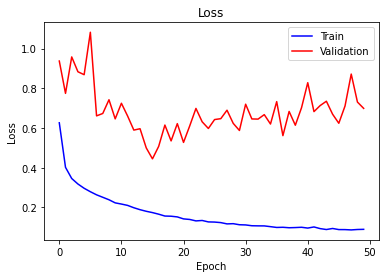

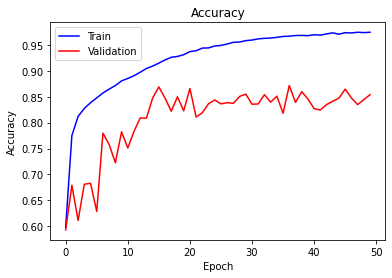

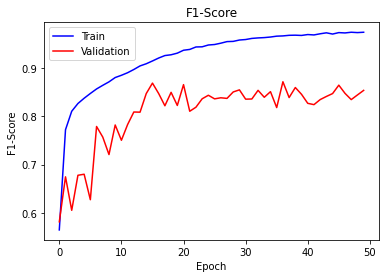

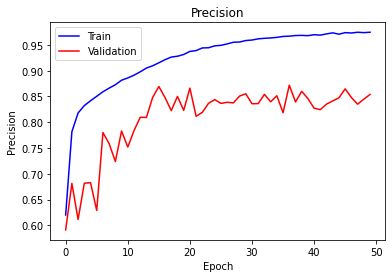

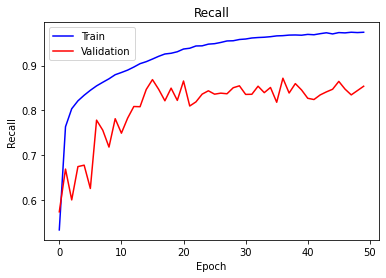

In [100]:
plot_history(best_history)

In [104]:
curr_acc = st.mean(best_history.history['val_acc'][45:50])
print(curr_acc)

0.8491234135730441


In [103]:
# Get prediction report
y_pred = best_model.predict(val_X, batch_size = 64, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)
print(classification_report(val_y, y_pred_bool))

69417/69417 [==============================] - 12s 168us/step
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     53990
           1       0.89      0.89      0.89      2068
           2       0.87      0.92      0.89      3156
           3       0.53      0.79      0.64     10203

    accuracy                           0.85     69417
   macro avg       0.81      0.87      0.83     69417
weighted avg       0.88      0.85      0.86     69417



In [56]:
validation = pd.DataFrame({'Y':val_y.flatten(), 'Prediction':y_pred_bool})
validation = pd.DataFrame(list(zip(val_y.flatten(), y_pred_bool)), columns = ['Y', 'Prediction'])
validation.to_csv('validation_prediction.csv')

In [105]:
# Get predictions using test data
test_files = ['TestData/subject_009_01__x.csv', 'TestData/subject_010_01__x.csv', 
             'TestData/subject_011_01__x.csv', 'TestData/subject_012_01__x.csv']

y_files = ['TestData/subject_009_01__y_time.csv', 'TestData/subject_010_01__y_time.csv',
          'TestData/subject_011_01__y_time.csv', 'TestData/subject_012_01__y_time.csv']

prediction_files = ['subject_009_01__y_prediction.csv', 'subject_010_01__y_prediction.csv',
                   'subject_011_01__y_prediction.csv', 'subject_012_01__y_prediction.csv']

def generate_test_data(X, time_steps, step):
    X_values = []
    for i in range(0, len(X) - time_steps, step):
        value = X.iloc[i:(i + time_steps)].values
        X_values.append(value)
    return np.array(X_values)

def reduce(y):
    y_output = []
    for i in range(0, y.shape[0], 4):
        item = list(y[i:i + 4])
        y_output.append(max(item, key = item.count))
    return np.array(y_output)

for i in range(len(test_files)):
    test_input = pd.read_csv(test_files[i])
    test_input = scale_data(test_input, ['X_acc', 'Y_acc', 'Z_acc', 'X_gyr', 'Y_gyr', 'Z_gyr'])
    y_frame = pd.read_csv(y_files[i])
    print(y_frame.shape)

    add_to_frame = y_frame.shape[0] * 4 - test_input.shape[0] + 30
    adding_dataframe = pd.DataFrame(test_input.iloc[-add_to_frame:])
    test_input = test_input.append(adding_dataframe)
    
    # Apply window technique
    X_test = generate_test_data(test_input, 30, 1)

    y_hat_encoded = best_model.predict(X_test, batch_size = 64, verbose = 1)
    
    y_hat = np.argmax(y_hat_encoded, axis = 1)
    
    y_actual = reduce(y_hat)
    #y_actual = y_actual[np.arange(y_actual.size - 1)]
    
    print(y_actual.shape)
    
    y_series = pd.Series(y_actual)
    y_series.to_csv("C2_predictions/" + prediction_files[i])

(9497, 1)
37988/37988 [==============================] - 6s 160us/step
(9497,)
(12269, 1)
49076/49076 [==============================] - 15s 314us/step
(12269,)
(12939, 1)
51756/51756 [==============================] - 11s 218us/step
(12939,)
(11329, 1)
45316/45316 [==============================] - 9s 196us/step
(11329,)
